# Esercizio: classificazione del set di dati CIFAR 10

CIFAR 10 è un insieme di 60.000 immagini 32x32 a colori, di cui 50.000 per l'addestramento e 10.000 per il test. Ogni immagine può appartenere ad una di 10 possibili categorie: 

* 0 	airplane
* 1 	automobile
* 2 	bird
* 3 	cat
* 4 	deer
* 5 	dog
* 6 	frog
* 7 	horse
* 8 	ship
* 9 	truck

## Preparazione dati

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Caricamento dell'insieme di dati.

(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [5]:
cifar_train_images_ok = cifar_train_images / 255.0
cifar_test_images_ok = cifar_test_images / 255.0

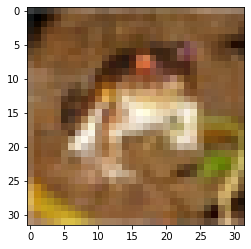

In [6]:
plt.imshow(cifar_train_images_ok[0])

In [7]:
# One Hot Ecoding delle etichette

cifar_train_labels_ok = tf.keras.utils.to_categorical(cifar_train_labels)
cifar_test_labels_ok = tf.keras.utils.to_categorical(cifar_test_labels)

In [8]:
# Creiamo anche un vettore di nomi per poter facilmente associare l'etichetta
# numerica al corrispondente significato

cifar_class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

cifar_class_names[cifar_train_labels[0, 0]]

'frog'

## Rete neurale fully connected

In [ ]:
# Possibile soluzione. Notare che, nonostante il numero molto alto di strati intermedi
# (e la conseguenza lentezza nell'addestramento) le prestazioni della rete sono molto
# inferiori a quelle che si sono ottenute con MNIST.

network_cifar = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               1573376   
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Addestriamo per 30 epoche. Notiamo che l'accuratezza sull'insieme di validazione
# si ferma intorno al 52%. Si nota anche una certa lentezza nel miglioramento della
# accuratezza sull'insieme di training.

# La rete neurale è molto complessa, apprende lentamente e con overfitting.

network_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cifar = network_cifar.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=30, batch_size=128, validation_split = 0.1)

Epoch 1/30
352/352 [==============================] - 3s 7ms/step - loss: 1.9001 - accuracy: 0.3182 - val_loss: 1.8291 - val_accuracy: 0.3364
Epoch 2/30
352/352 [==============================] - 2s 7ms/step - loss: 1.6727 - accuracy: 0.4018 - val_loss: 1.6425 - val_accuracy: 0.4130
Epoch 3/30
352/352 [==============================] - 2s 7ms/step - loss: 1.5860 - accuracy: 0.4342 - val_loss: 1.5635 - val_accuracy: 0.4390
Epoch 4/30
352/352 [==============================] - 3s 8ms/step - loss: 1.5273 - accuracy: 0.4557 - val_loss: 1.5412 - val_accuracy: 0.4500
Epoch 5/30
352/352 [==============================] - 3s 7ms/step - loss: 1.4902 - accuracy: 0.4697 - val_loss: 1.5285 - val_accuracy: 0.4514
Epoch 6/30
352/352 [==============================] - 3s 7ms/step - loss: 1.4464 - accuracy: 0.4844 - val_loss: 1.5267 - val_accuracy: 0.4654
Epoch 7/30
352/352 [==============================] - 3s 8ms/step - loss: 1.4165 - accuracy: 0.4967 - val_loss: 1.4493 - val_accuracy: 0.4844
Epoch 

In [ ]:
# Questo è l'elenco delle immagini (dell'insieme di addestramento) per cui la rete sbaglia

cifar_predictions = network_cifar.predict(cifar_train_images_ok)
cifar_mistakes = np.where([ np.argmax(x) for x in cifar_predictions] != cifar_train_labels.flatten())[0]
cifar_mistakes

array([    4,     9,    11, ..., 49994, 49995, 49999])

Immagine n.  4
Predizione:  airplane
Valore effettivo:  automobile


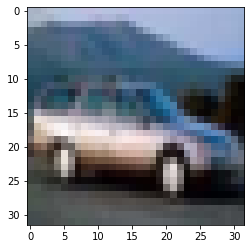

In [ ]:
# Controlliamo la prima immagine sbagiata

print("Immagine n. ", cifar_mistakes[0])
print("Predizione: ", cifar_class_names[np.argmax(cifar_mistakes[0])])
print("Valore effettivo: ", cifar_class_names[cifar_train_labels[cifar_mistakes[0], 0]])

plt.imshow(cifar_train_images[cifar_mistakes[0]])

In [ ]:
# Riaddestro usando tutti i dati di addestramento per 24 epoche, il numero di epoche
# che ha prodotto il valore maggiore di accuratezza sull'insieme di validazione. Si
# noti che questo valore cambia di solito ogni volta che si riaddestra la rete.

network_cifar_final = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network_cifar_final.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=24, batch_size=128)

Epoch 1/24
391/391 [==============================] - 3s 7ms/step - loss: 1.8868 - accuracy: 0.3239
Epoch 2/24
391/391 [==============================] - 3s 7ms/step - loss: 1.6701 - accuracy: 0.4000
Epoch 3/24
391/391 [==============================] - 3s 7ms/step - loss: 1.5850 - accuracy: 0.4337
Epoch 4/24
391/391 [==============================] - 3s 6ms/step - loss: 1.5278 - accuracy: 0.4537
Epoch 5/24
391/391 [==============================] - 3s 7ms/step - loss: 1.4764 - accuracy: 0.4735
Epoch 6/24
391/391 [==============================] - 3s 7ms/step - loss: 1.4423 - accuracy: 0.4841
Epoch 7/24
391/391 [==============================] - 3s 7ms/step - loss: 1.4016 - accuracy: 0.5027
Epoch 8/24
391/391 [==============================] - 3s 7ms/step - loss: 1.3708 - accuracy: 0.5127
Epoch 9/24
391/391 [==============================] - 3s 8ms/step - loss: 1.3452 - accuracy: 0.5208
Epoch 10/24
391/391 [==============================] - 3s 7ms/step - loss: 1.3275 - accuracy: 0.5255

In [ ]:
# Valutiamo il risultato finale sull'insieme di test.

network_cifar_final.evaluate(cifar_test_images_ok, cifar_test_labels_ok)

313/313 [==============================] - 1s 4ms/step - loss: 1.4464 - accuracy: 0.5064


[1.4463984966278076, 0.5063999891281128]

## Rete convoluzionale

In [9]:
# Usiamo allora una rete convoluzionale invece di una fully-connected. La rete convoluzionale
# avrà molti meno pesi ed è intrinsecamente più adatta al riconoscimento delle immagini.

network_cifar2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [10]:
# Addestriamo la rete convoluzionale. Vediamo che, sebbene siamo ancora in presenza 
# di overfitting, l'accuratezza sia sull'insieme di addestramento che di validazione 
# è più alta adesso rispetto che nella rete fully-connected precedente.

network_cifar2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cifar2 = network_cifar2.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
352/352 [==============================] - 14s 14ms/step - loss: 1.6225 - accuracy: 0.4068 - val_loss: 1.3363 - val_accuracy: 0.5166
Epoch 2/30
352/352 [==============================] - 5s 13ms/step - loss: 1.2665 - accuracy: 0.5467 - val_loss: 1.2534 - val_accuracy: 0.5732
Epoch 3/30
352/352 [==============================] - 4s 12ms/step - loss: 1.1049 - accuracy: 0.6111 - val_loss: 1.0606 - val_accuracy: 0.6232
Epoch 4/30
352/352 [==============================] - 4s 12ms/step - loss: 0.9847 - accuracy: 0.6549 - val_loss: 0.9879 - val_accuracy: 0.6538
Epoch 5/30
352/352 [==============================] - 4s 12ms/step - loss: 0.8929 - accuracy: 0.6901 - val_loss: 0.8928 - val_accuracy: 0.6920
Epoch 6/30
352/352 [==============================] - 4s 12ms/step - loss: 0.8168 - accuracy: 0.7158 - val_loss: 0.9299 - val_accuracy: 0.6858
Epoch 7/30
352/352 [==============================] - 4s 12ms/step - loss: 0.7559 - accuracy: 0.7370 - val_loss: 0.8144 - val_accuracy: 0.717

In [13]:
# Riaddestro usando tutti i dati di addestramento per 19 epoche, il numero di epoche
# che ha prodotto il valore maggiore di accuratezza sull'insieme di validazione. Si
# noti che questo valore cambia di solito ad ogni esecuzione dela procedura di 
# addestramento.

network_cifar2_final = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar2_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network_cifar2_final.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=19, batch_size=128)

Epoch 1/19
391/391 [==============================] - 5s 12ms/step - loss: 1.5742 - accuracy: 0.4250
Epoch 2/19
391/391 [==============================] - 5s 12ms/step - loss: 1.2281 - accuracy: 0.5635
Epoch 3/19
391/391 [==============================] - 5s 12ms/step - loss: 1.0569 - accuracy: 0.6301
Epoch 4/19
391/391 [==============================] - 5s 12ms/step - loss: 0.9501 - accuracy: 0.6693
Epoch 5/19
391/391 [==============================] - 5s 12ms/step - loss: 0.8662 - accuracy: 0.6959
Epoch 6/19
391/391 [==============================] - 5s 12ms/step - loss: 0.7991 - accuracy: 0.7212
Epoch 7/19
391/391 [==============================] - 5s 12ms/step - loss: 0.7431 - accuracy: 0.7420
Epoch 8/19
391/391 [==============================] - 5s 12ms/step - loss: 0.6877 - accuracy: 0.7610
Epoch 9/19
391/391 [==============================] - 5s 12ms/step - loss: 0.6369 - accuracy: 0.7799
Epoch 10/19
391/391 [==============================] - 4s 11ms/step - loss: 0.5890 - accura

In [14]:
# Valuto sull'insieme di test. Si noti che l'accuratezza è notevolmente aumentata
# rispetto alla rete full-connected.

network_cifar2_final.evaluate(cifar_test_images_ok, cifar_test_labels_ok)

313/313 [==============================] - 2s 5ms/step - loss: 1.0995 - accuracy: 0.7258


[1.0995346307754517, 0.7257999777793884]

# Rete convoluzionale con Dropout

In [16]:
# Per provare a ridurre l'overfitting, aggiungiamo degli strati di dropout.

network_cifar3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [17]:
# Si notiche l'addestramento con droupout riduce di molto l'overfitting: l'accuratezza
# sull'insieme di validazione è molto più simile a quella sull'insieme di training
# rispetto a quello che accadeva con network_cifar2.

network_cifar3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cifar3 = network_cifar3.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
352/352 [==============================] - 5s 13ms/step - loss: 1.6766 - accuracy: 0.3816 - val_loss: 1.3669 - val_accuracy: 0.5114
Epoch 2/30
352/352 [==============================] - 5s 14ms/step - loss: 1.3146 - accuracy: 0.5253 - val_loss: 1.1953 - val_accuracy: 0.5854
Epoch 3/30
352/352 [==============================] - 5s 14ms/step - loss: 1.1726 - accuracy: 0.5843 - val_loss: 1.1124 - val_accuracy: 0.6090
Epoch 4/30
352/352 [==============================] - 5s 14ms/step - loss: 1.0715 - accuracy: 0.6239 - val_loss: 0.9861 - val_accuracy: 0.6572
Epoch 5/30
352/352 [==============================] - 5s 14ms/step - loss: 0.9864 - accuracy: 0.6532 - val_loss: 0.9058 - val_accuracy: 0.6820
Epoch 6/30
352/352 [==============================] - 5s 14ms/step - loss: 0.9285 - accuracy: 0.6722 - val_loss: 0.8661 - val_accuracy: 0.6944
Epoch 7/30
352/352 [==============================] - 5s 13ms/step - loss: 0.8726 - accuracy: 0.6925 - val_loss: 0.8567 - val_accuracy: 0.7068

In [18]:
# Riaddestro usando tutti i dati di addestramento per 28 epoche, il numero di epoche
# che ha prodotto il valore maggiore di accuratezza sull'insieme di validazione. Si
# noti che questo valore cambia di solito ad ogni esecuzione dela procedura di 
# addestramento.

network_cifar3_final = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar3_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network_cifar3_final.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=28, batch_size=128)

Epoch 1/28
391/391 [==============================] - 6s 14ms/step - loss: 1.6816 - accuracy: 0.3842
Epoch 2/28
391/391 [==============================] - 5s 14ms/step - loss: 1.2973 - accuracy: 0.5345
Epoch 3/28
391/391 [==============================] - 5s 12ms/step - loss: 1.1446 - accuracy: 0.5978
Epoch 4/28
391/391 [==============================] - 5s 12ms/step - loss: 1.0336 - accuracy: 0.6341
Epoch 5/28
391/391 [==============================] - 5s 12ms/step - loss: 0.9607 - accuracy: 0.6650
Epoch 6/28
391/391 [==============================] - 5s 14ms/step - loss: 0.9020 - accuracy: 0.6826
Epoch 7/28
391/391 [==============================] - 5s 13ms/step - loss: 0.8591 - accuracy: 0.6995
Epoch 8/28
391/391 [==============================] - 5s 12ms/step - loss: 0.8123 - accuracy: 0.7141
Epoch 9/28
391/391 [==============================] - 5s 12ms/step - loss: 0.7763 - accuracy: 0.7272
Epoch 10/28
391/391 [==============================] - 5s 12ms/step - loss: 0.7412 - accura

In [19]:
# Valuto sull'insieme di test.

network_cifar3_final.evaluate(cifar_test_images_ok, cifar_test_labels_ok)

313/313 [==============================] - 2s 4ms/step - loss: 0.7431 - accuracy: 0.7610


[0.7431220412254333, 0.7609999775886536]